In [1]:
import pandas as pd
print("Version of pandas : ",pd.__version__)
import seaborn as sns
print("Version of seaborn : ",sns.__version__)
import matplotlib.pyplot as plt
import numpy as np
print("Version of numpy : ",np.__version__)
%matplotlib inline
import sklearn as sk
print("Version of scikit-learnt : ",sk.__version__)
import math

Version of pandas :  1.0.5
Version of seaborn :  0.10.1
Version of numpy :  1.18.5
Version of scikit-learnt :  0.23.1


In [2]:
train_data = pd.read_csv("./titanic.csv")
train_data.head(3)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [3]:
print("Total no of columns : " , train_data.shape[1])

Total no of columns :  14


In [4]:
#Name , ticket are not needed
train_data.drop(["name" , "ticket"] , axis = 1 , inplace = True)

In [5]:
print("Total no of columns : " , train_data.shape[1])
train_data.head(3)

Total no of columns :  12


,pclass,survived,sex,age,sibsp,parch,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,female,29.0000,0.0,0.0,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,male,0.9167,1.0,2.0,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,female,2.0000,1.0,2.0,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [6]:
print("Total no of unique destination : " , len(train_data['home.dest'].unique()))

Total no of unique destination :  370


[Text(0, 0, 'St Louis, MO'),
 Text(0, 0, 'Montreal, PQ / Chesterville, ON'),
 Text(0, 0, 'New York, NY'),
 Text(0, 0, 'Hudson, NY'),
 Text(0, 0, 'Belfast, NI'),
 Text(0, 0, 'Bayside, Queens, NY'),
 Text(0, 0, 'Montevideo, Uruguay'),
 Text(0, 0, 'Paris, France'),
 Text(0, 0, 'Hessle, Yorks'),
 Text(0, 0, 'Montreal, PQ'),
 Text(0, 0, 'Winnipeg, MN'),
 Text(0, 0, 'San Francisco, CA'),
 Text(0, 0, 'Dowagiac, MI'),
 Text(0, 0, 'Stockholm, Sweden / Washington, DC'),
 Text(0, 0, 'Trenton, NJ'),
 Text(0, 0, 'Glen Ridge, NJ'),
 Text(0, 0, 'Youngstown, OH'),
 Text(0, 0, 'Birkdale, England Cleveland, Ohio'),
 Text(0, 0, 'London / Winnipeg, MB'),
 Text(0, 0, 'Cooperstown, NY'),
 Text(0, 0, 'St Leonards-on-Sea, England Ohio'),
 Text(0, 0, 'Los Angeles, CA'),
 Text(0, 0, 'Pomeroy, WA'),
 Text(0, 0, 'Omaha, NE'),
 Text(0, 0, 'Philadelphia, PA'),
 Text(0, 0, 'Denver, CO'),
 Text(0, 0, 'Belmont, MA'),
 Text(0, 0, 'Washington, DC'),
 Text(0, 0, 'Austria-Hungary / Germantown, Philadelphia, PA')]

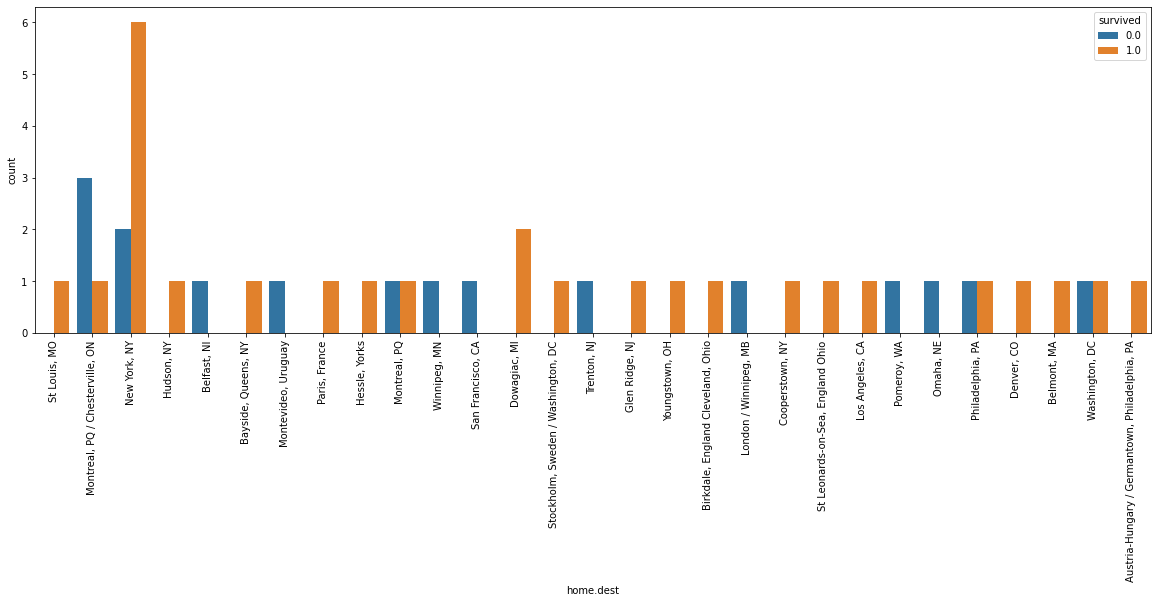

In [7]:
plt.figure(figsize = (20 , 6))
c = sns.countplot(x = 'home.dest' , data = train_data.loc[range(50)] , hue = 'survived')
c.set_xticklabels(c.get_xticklabels() , rotation = 90)

In [8]:
des_name = list(train_data['home.dest'].unique())
train_data['home.dest'] = train_data['home.dest'].apply(lambda dest : des_name.index(dest))

In [9]:
train_data.head(3)

,pclass,survived,sex,age,sibsp,parch,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,female,29.0000,0.0,0.0,211.3375,B5,S,2,NaN,0
1,1.0,1.0,male,0.9167,1.0,2.0,151.5500,C22 C26,S,11,NaN,1
2,1.0,0.0,female,2.0000,1.0,2.0,151.5500,C22 C26,S,NaN,NaN,1


[]

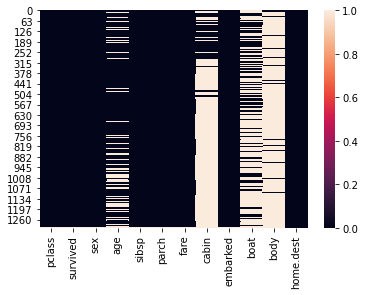

In [10]:
sns.heatmap(train_data.isna())
plt.plot()

In [11]:
train_data.drop(["cabin" , "boat" , 'body'] , axis = 1 , inplace = True )

[]

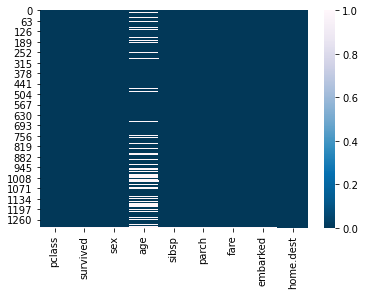

In [12]:
sns.heatmap(train_data.isna() , cmap = "PuBu_r")
plt.plot()

[]

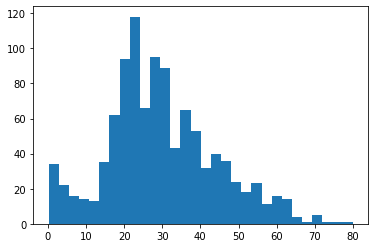

In [14]:
plt.hist(train_data['age'].dropna() , bins = 30)
plt.plot()

In [15]:
data = train_data[['age' , 'pclass']].dropna()

[]

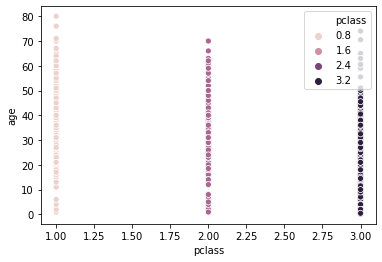

In [16]:
sns.scatterplot(data = data , x = 'pclass' , y = 'age' , hue = 'pclass' , cmap = "virdis")
plt.plot()

[]

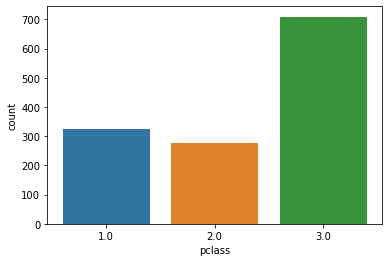

In [17]:
sns.countplot(x = 'pclass' , data = train_data)
plt.plot()

[]

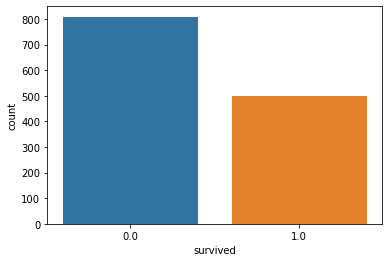

In [18]:
sns.countplot(x = 'survived' , data = train_data)
plt.plot()

[]

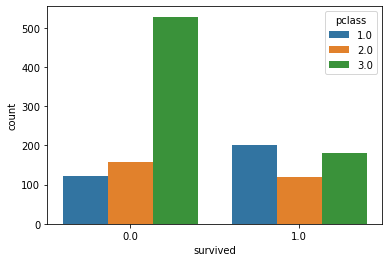

In [19]:
sns.countplot(x = 'survived' , data = train_data , hue = "pclass")
plt.plot()

[]

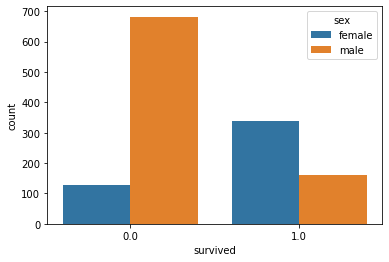

In [20]:
sns.countplot(x = 'survived' , data = train_data , hue = "sex")
plt.plot()

In [21]:
avg_age_class1 = math.ceil(data[data['pclass'] == 1]['age'].mean())
print("avg_age_class1 : ",avg_age_class1)
avg_age_class2 = math.ceil(data[data['pclass'] == 2]['age'].mean())
print("avg_age_class2 : ",avg_age_class2)
avg_age_class3 = math.ceil(data[data['pclass'] == 3]['age'].mean())
print("avg_age_class3 : ",avg_age_class3)

avg_age_class1 :  40
avg_age_class2 :  30
avg_age_class3 :  25


In [22]:
def updateAge(List):
    age = List[0]
    Pclass = List[1]
    if pd.isnull(age):
        if Pclass == 1:
            age = avg_age_class1
        elif Pclass == 2:
            age = avg_age_class2
        else:
            age = avg_age_class1
    return age

In [23]:
train_data['age'] = train_data[['age' , "pclass"]].apply(updateAge , axis = 1)

[]

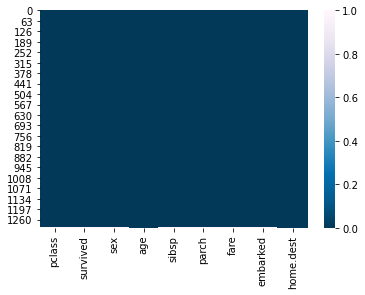

In [24]:
sns.heatmap(train_data.isna() , cmap = "PuBu_r")
plt.plot()

In [25]:
train_data.dropna(inplace = True)

[]

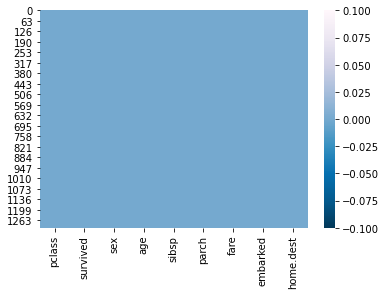

In [26]:
sns.heatmap(train_data.isna() , cmap = "PuBu_r")
plt.plot()

In [27]:
train_data.head(n = 3)

,pclass,survived,sex,age,sibsp,parch,fare,embarked,home.dest
0,1.0,1.0,female,29.0000,0.0,0.0,211.3375,S,0
1,1.0,1.0,male,0.9167,1.0,2.0,151.5500,S,1
2,1.0,0.0,female,2.0000,1.0,2.0,151.5500,S,1


[]

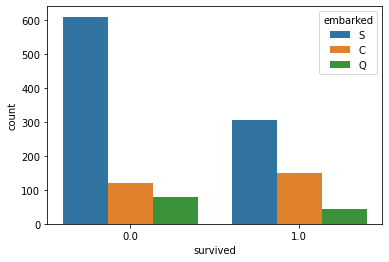

In [28]:
sns.countplot(x = 'survived' , data = train_data , hue = "embarked")
plt.plot()

In [29]:
e = ['S' , 'C' , 'Q']
train_data['embarked'] = train_data['embarked'].apply(lambda emb : e.index(emb))

In [30]:
train_data.head(3)

,pclass,survived,sex,age,sibsp,parch,fare,embarked,home.dest
0,1.0,1.0,female,29.0000,0.0,0.0,211.3375,0,0
1,1.0,1.0,male,0.9167,1.0,2.0,151.5500,0,1
2,1.0,0.0,female,2.0000,1.0,2.0,151.5500,0,1


[]

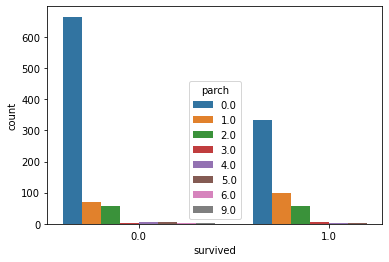

In [31]:
sns.countplot(x = 'survived' , data = train_data , hue = "parch")
plt.plot()

[]

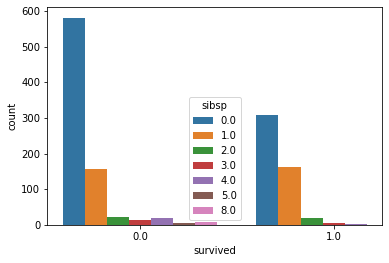

In [32]:
sns.countplot(x = 'survived' , data = train_data , hue = "sibsp")
plt.plot()

In [33]:
train_data.drop("fare" , axis = 1 , inplace = True)

In [34]:
def replaceSex(s):
    if s == "male":
        return 1
    return 0

In [35]:
train_data['sex'] = train_data['sex'].apply(replaceSex) #1->male  || 0->female

In [36]:
train_data.head(n = 3)

,pclass,survived,sex,age,sibsp,parch,embarked,home.dest
0,1.0,1.0,0,29.0000,0.0,0.0,0,0
1,1.0,1.0,1,0.9167,1.0,2.0,0,1
2,1.0,0.0,0,2.0000,1.0,2.0,0,1


In [37]:
X = train_data.drop("survived" , axis = 1)
y = train_data['survived']

In [38]:
print("Shape of X : ",X.shape)
print("Shape of y : ",y.shape)

Shape of X :  (1306, 7)
Shape of y :  (1306,)


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)

In [41]:
print("Details of train_data : ")
print("Shape of X_train : " , X_train.shape)
print("Shape of y_train : " , y_train.shape)
print("Features name : ",X_train.columns)
print("Target name : Survived")
print("\n================================\n")
print("Details of test_data : ")
print("Shape of X_test : " , X_test.shape)
print("Shape of y_test : " , y_test.shape)

Details of train_data : 
Shape of X_train :  (979, 7)
Shape of y_train :  (979,)
Features name :  Index(['pclass', 'sex', 'age', 'sibsp', 'parch', 'embarked', 'home.dest'], dtype='object')
Target name : Survived


Details of test_data : 
Shape of X_test :  (327, 7)
Shape of y_test :  (327,)


In [42]:
C_ = [0.0001,0.001,0.01,0.1,1,5,10,20,30,40,50,100]

model = {}
acc = []
val_acc = []

for i in C_:
    model_name = "model_c_" + str(i)
    model[model_name] = {}
    model_LR = LogisticRegression(C = i , solver='lbfgs' , max_iter=10000).fit(X_train , y_train)
    model[model_name]['model'] = model_LR
    
    model[model_name]['acc'] = model_LR.score(X_train , y_train)
    acc.append(model[model_name]['acc'])

    model[model_name]['val_acc'] = model_LR.score(X_test , y_test)
    val_acc.append(model[model_name]['val_acc'])

[]

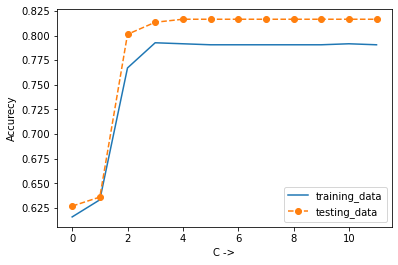

In [43]:
plt.plot(acc , label = "training_data")
plt.plot(val_acc,'o--' , label = "testing_data")
plt.ylabel("Accurecy")
plt.xlabel("C ->")
plt.legend()
plt.plot()

In [44]:
take_model = model["model_c_10"]['model']

In [45]:
take_model = model["model_c_10"]['model']

In [46]:
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score

In [47]:
print("Confusion matrix for train _data : ")
print(confusion_matrix(y_train , take_model.predict(X_train)))
print("Confusion matrix for test _data : ")
print(confusion_matrix(y_test , take_model.predict(X_test)))

Confusion matrix for train _data : 
[[518  85]
 [120 256]]
Confusion matrix for test _data : 
[[180  25]
 [ 35  87]]


In [48]:
print("Accurecy score for training data : %.3f %%"%( accuracy_score(y_train , take_model.predict(X_train)) * 100))
print("Accurecy score for testing data : %.3f %%"%( accuracy_score(y_test , take_model.predict(X_test)) * 100))

Accurecy score for training data : 79.060 %
Accurecy score for testing data : 81.651 %


In [49]:
print("Classification report for training data : \n============================================================\n")
print(classification_report(y_train , take_model.predict(X_train)))
print("\nClassification report for testing data : \n============================================================\n")
print(classification_report(y_test , take_model.predict(X_test)))

Classification report for training data : 

              precision    recall  f1-score   support

         0.0       0.81      0.86      0.83       603
         1.0       0.75      0.68      0.71       376

    accuracy                           0.79       979
   macro avg       0.78      0.77      0.77       979
weighted avg       0.79      0.79      0.79       979


Classification report for testing data : 

              precision    recall  f1-score   support

         0.0       0.84      0.88      0.86       205
         1.0       0.78      0.71      0.74       122

    accuracy                           0.82       327
   macro avg       0.81      0.80      0.80       327
weighted avg       0.81      0.82      0.81       327

